In [267]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
# Generate data
# Bias the data along some chosen directions
pc1 = (-1+2*np.random.random(8))
pc1 = pc1/np.linalg.norm(pc1)
pc2 = (-1+2*np.random.random(8))
pc2 = pc2/(2*np.linalg.norm(pc2))
pc3 = (-1+2*np.random.random(8))
pc3 = pc3/(4*np.linalg.norm(pc3))
pc4 = (-1+2*np.random.random(8))
pc4 = pc4/(8*np.linalg.norm(pc4))
data = np.zeros((5000, 8))
coeffdata = np.zeros((5000, 4))
for i in range(1000):
    coeffs = np.random.randn(4)
    coeffdata[i] = coeffs
    data[i] = pc1 * coeffs[0] + pc2 * coeffs[1] + pc3 * coeffs[2] + pc4 * coeffs[3]

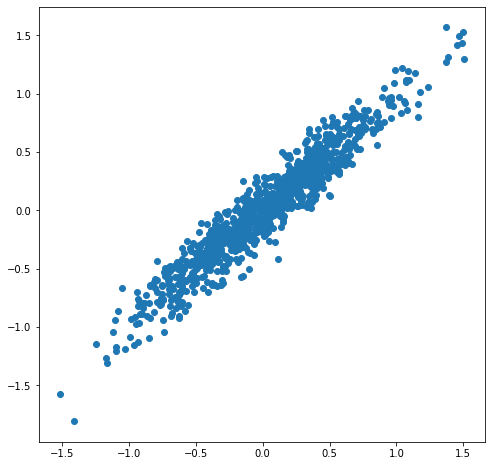

In [269]:
plt.figure(figsize=(8,8))
plt.scatter(data[:, 0], data[:, 1])

In [270]:
# Make the network
ae = Sequential()
ae.add(Input(8))
ae.add(Dense(4, use_bias=False, activation='linear', kernel_initializer='orthogonal'))
ae.add(Dense(8, use_bias=False, activation='linear', kernel_initializer='orthogonal'))
ae.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
ae.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 32        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [271]:
# As an autoencoder, train x and train y are the same
h = ae.fit(data, data, epochs = 100)

Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 132us/sample - loss: 0.0427 - accuracy: 0.8608
Epoch 2/100
5000/5000 [==============================] - 0s 99us/sample - loss: 0.0166 - accuracy: 0.8910
Epoch 3/100
5000/5000 [==============================] - 0s 83us/sample - loss: 0.0071 - accuracy: 0.8856
Epoch 4/100
5000/5000 [==============================] - 0s 81us/sample - loss: 0.0049 - accuracy: 0.8950
Epoch 5/100
5000/5000 [==============================] - 0s 93us/sample - loss: 0.0035 - accuracy: 0.9054
Epoch 6/100
5000/5000 [==============================] - 0s 78us/sample - loss: 0.0023 - accuracy: 0.9234
Epoch 7/100
5000/5000 [==============================] - 0s 83us/sample - loss: 0.0014 - accuracy: 0.9390
Epoch 8/100
5000/5000 [==============================] - 0s 86us/sample - loss: 9.3395e-04 - accuracy: 0.9484
Epoch 9/100
5000/5000 [==============================] - 0s 86us/sample - loss: 6.7389e-04 - accuracy: 0.9516
Epoch 10/100
50

5000/5000 [==============================] - 0s 80us/sample - loss: 2.3601e-07 - accuracy: 0.9998
Epoch 75/100
5000/5000 [==============================] - 0s 77us/sample - loss: 5.8806e-08 - accuracy: 1.0000
Epoch 76/100
5000/5000 [==============================] - 0s 76us/sample - loss: 1.3229e-08 - accuracy: 1.0000
Epoch 77/100
5000/5000 [==============================] - 0s 87us/sample - loss: 2.4737e-09 - accuracy: 1.0000
Epoch 78/100
5000/5000 [==============================] - 0s 84us/sample - loss: 4.0276e-10 - accuracy: 1.0000
Epoch 79/100
5000/5000 [==============================] - 0s 84us/sample - loss: 5.8670e-11 - accuracy: 1.0000
Epoch 80/100
5000/5000 [==============================] - 0s 78us/sample - loss: 1.5179e-09 - accuracy: 1.0000
Epoch 81/100
5000/5000 [==============================] - 0s 72us/sample - loss: 8.0847e-08 - accuracy: 0.9996
Epoch 82/100
5000/5000 [==============================] - 0s 78us/sample - loss: 1.8339e-07 - accuracy: 0.9994
Epoch 83/100
5

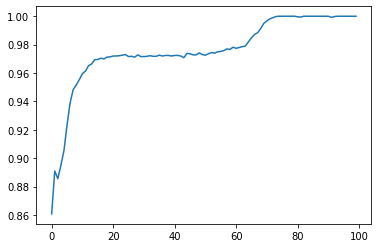

In [272]:
plt.plot(h.history['accuracy'])

In [273]:
print(np.matmul(np.transpose(ae.weights[0][:,:]), np.transpose(data[0:1])))
print(np.transpose(coeffdata[0:1]))

[[ 0.336]
 [-0.432]
 [-0.502]
 [-0.511]]
[[ 0.675]
 [-0.709]
 [ 0.42 ]
 [-0.475]]


In [274]:
print(pc1)
print(pc2)
print(pc3)
print(pc4)
print(ae.weights[0][:,0])
print(ae.weights[0][:,1])
print(ae.weights[0][:,2])
print(ae.weights[0][:,3])

[ 0.432  0.378  0.428 -0.387 -0.224 -0.41  -0.273  0.212]
[-0.173 -0.248 -0.263  0.052 -0.2   -0.121  0.065  0.167]
[-0.061 -0.093  0.131  0.007 -0.107  0.021  0.03   0.142]
[ 0.04  -0.063 -0.06   0.031  0.049 -0.009 -0.014 -0.053]
tf.Tensor([ 0.556  0.232 -0.565 -0.617 -0.374 -0.254 -0.124  0.52 ], shape=(8,), dtype=float32)
tf.Tensor([ 0.187 -0.988 -0.056  0.352  0.723 -0.281 -0.414 -0.238], shape=(8,), dtype=float32)
tf.Tensor([-0.59   0.529 -0.724  0.345  0.255 -0.041 -0.104 -0.041], shape=(8,), dtype=float32)
tf.Tensor([-0.138 -0.936 -0.026 -0.113 -0.008  0.033  0.664  0.543], shape=(8,), dtype=float32)


In [275]:
rv = (np.random.randn(1)*pc1 + np.random.randn(1)*pc2 + np.random.randn(1)*pc3 + np.random.randn(1)*pc4).reshape(1, 8)
ae.predict(rv) - rv
# It seems to be able to handle arbitrary combinations of the PCs well enough.
# But the internal representation is not the same as any of them.
# The span of the internal representation seems to be about the same as the span of the first few principal components, though.

array([[ 6.605e-07, -5.524e-07, -2.202e-06,  6.340e-07,  1.366e-06,
        -5.944e-07, -3.952e-07, -1.542e-06]])

In [276]:
reps = np.zeros((len(data), 4))

In [277]:
for i in range(len(data)):
    reps[i] = np.matmul(np.transpose(ae.weights[0][:,:]), np.transpose(data[i:(i+1)])).reshape(4)

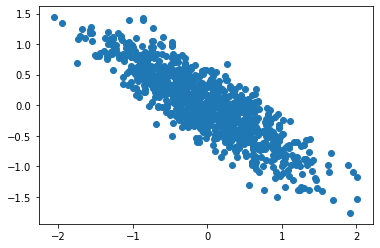

In [278]:
plt.scatter(reps[:,0], reps[:,2])

In [288]:
# Something extremely interesting: The pair of matrices learned by the autoencoder are pseudoinverses!
# ABA = A, BAB = B (The differences between them are on the order of 10^-6, anyway)
print(np.max(np.matmul(np.transpose(ae.weights[0][:,:]), np.matmul(np.transpose(ae.weights[1][:,:]), np.transpose(ae.weights[0][:,:]))) - np.transpose(ae.weights[0][:,:])))
print(np.max(np.matmul(np.transpose(ae.weights[1][:,:]), np.matmul(np.transpose(ae.weights[0][:,:]), np.transpose(ae.weights[1][:,:]))) - np.transpose(ae.weights[1][:,:])))

1.6391277e-06
1.4901161e-06


In [ ]:
# Another description I heard of this was that given some input vector, 
# the output vector is the projection onto the subspace spanned by the first four principal components.
# This encoder learns some projection onto this subspace, then learns the pseudoinverse of that.

In [572]:
def generate_image(k1, k2, n1, n2, s=11):
    a = np.array([[1 if (s*j + i)%n1 == k1 else 0 for i in range(s)] for j in range(s)])
    return a + np.array([[1 if (s*i + j)%n2 == k2 else 0 for i in range(s)] for j in range(s)])

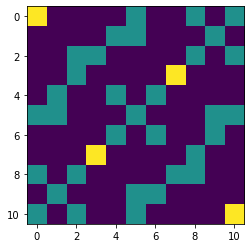

In [590]:
plt.imshow(generate_image(0, 0, 8, 5))

In [423]:
# total count of patterns for each n:
print([(((n+1)*n/2 - (n+1)))**2 for n in range(3, 12)])

[4.0, 25.0, 81.0, 196.0, 400.0, 729.0, 1225.0, 1936.0, 2916.0]


In [591]:
# Ignore "mod 1" case
def gen_all_images(s=11):
    patterns = int((((s+1)*s/2 - (s+1)))**2)
    imgs = np.zeros((patterns, s, s))
    index = 0
    for n1 in range(2, s):
        for n2 in range(2, s):
            for k1 in range(0, n1):
                for k2 in range(0, n2):
                    imgs[index] = generate_image(k1, k2, n1, n2, s)
                    index += 1
    return imgs

In [592]:
imgs = gen_all_images(11)

In [593]:
imgs.shape

(2916, 11, 11)

In [698]:
ae2 = Sequential()
ae2.add(Input((11, 11)))
ae2.add(Flatten())
ae2.add(Dense(40, use_bias=False, activation='linear'))
ae2.add(Dense(121, use_bias=False, activation='linear'))
ae2.add(Reshape((11, 11)))
ae2.compile(optimizer='adam', loss='mse', metrics=['mse'])
ae2.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 121)               0         
_________________________________________________________________
dense_218 (Dense)            (None, 40)                4840      
_________________________________________________________________
dense_219 (Dense)            (None, 121)               4840      
_________________________________________________________________
reshape_36 (Reshape)         (None, 11, 11)            0         
Total params: 9,680
Trainable params: 9,680
Non-trainable params: 0
_________________________________________________________________


In [699]:
h = ae2.fit(imgs, imgs, epochs = 50)

Train on 2916 samples
Epoch 1/50
2916/2916 [==============================] - 0s 151us/sample - loss: 0.3057 - mse: 0.3057
Epoch 2/50
2916/2916 [==============================] - 0s 84us/sample - loss: 0.1165 - mse: 0.1165
Epoch 3/50
2916/2916 [==============================] - 0s 99us/sample - loss: 0.0692 - mse: 0.0692
Epoch 4/50
2916/2916 [==============================] - 0s 92us/sample - loss: 0.0476 - mse: 0.0476
Epoch 5/50
2916/2916 [==============================] - 0s 82us/sample - loss: 0.0346 - mse: 0.0346
Epoch 6/50
2916/2916 [==============================] - 0s 81us/sample - loss: 0.0261 - mse: 0.0261
Epoch 7/50
2916/2916 [==============================] - 0s 86us/sample - loss: 0.0203 - mse: 0.0203
Epoch 8/50
2916/2916 [==============================] - 0s 82us/sample - loss: 0.0160 - mse: 0.0160
Epoch 9/50
2916/2916 [==============================] - 0s 87us/sample - loss: 0.0128 - mse: 0.0128
Epoch 10/50
2916/2916 [==============================] - 0s 82us/sample - los

Actual difference: 0.000%


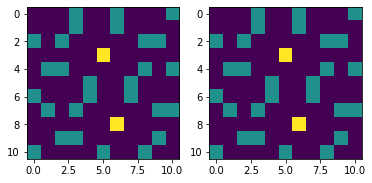

In [700]:
ind = 1295
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(imgs[ind])
pred = ae2.predict(imgs[ind:(ind+1)]).reshape(11,11).round()
ax2.imshow(pred)
print('Actual difference: {:.3f}%'.format(100*(np.sum(np.abs(imgs[ind] - pred))/121)))

In [701]:
preds = ae2.predict(imgs).reshape(2916, 11, 11).round()
avg_diff = np.sum(np.abs(preds - imgs))/(121*2916)

In [702]:
print('Average difference: {:.8f}%'.format(100*avg_diff))

Average difference: 0.00000000%


In [ ]:
# 40 neurons in the hidden layer seems to be the first place that the reproduction is actually 100% correct (when rounded).
# I tried adding more layers and different activation functions, but it nearly always just increased the error.
# This is odd, because I created these images with just 4 numbers,
# but I guess it would be unrealistic to hope for the model to learn the exact same representation.

In [712]:
W1 = np.transpose(ae2.weights[0][:,:])
W2 = np.transpose(ae2.weights[1][:,:])

(40, 121)

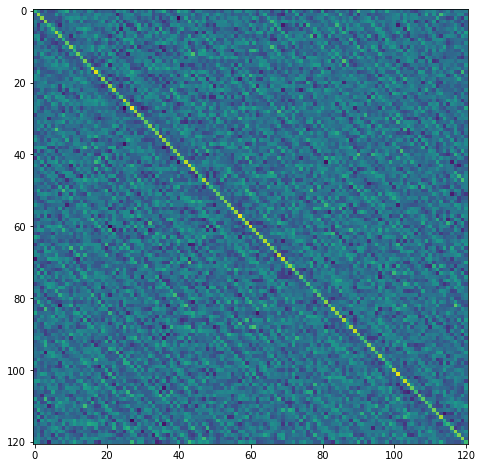

In [737]:
plt.figure(figsize=(8,8))
plt.imshow(np.matmul(W2, W1))

In [756]:
encoded = np.array([np.matmul(W1, imgs[i].reshape(121,1)) for i in range(len(imgs))])

In [757]:
means = np.mean(encoded, axis=0)
stds = np.std(encoded, axis=0)

In [ ]:
# I couldn't really find anything interesting about the structure of this feature representation.
# It does manage to recreate the images, somehow.
# Just not as efficiently as I would have hoped.